In [1]:
# 画像クラスタリングを実装していきます

# 1. torchvision によって提供されている事前学習済みモデルMobilenetV3を用いて画像から特徴量を抽出
# 2. 抽出した特徴量を用いてX-meansによるクラスタリングを行い、画像を分類

In [2]:
import json
from pathlib import Path

import numpy as np
import torch
import torchvision
from PIL import Image
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.datasets.utils import download_url

In [3]:
# デバイスを作成
def get_device(use_gpu):
    if use_gpu and torch.cuda.is_available():
        # これを有効にしないと、計算した勾配が毎回異なり、再現性が担保できない。
        torch.backends.cudnn.deterministic = True
        return torch.device("cuda")
    else:
        return torch.device("cpu")


# デバイスを選択する。
device = get_device(use_gpu=True)

In [4]:
# モデルを作成
# model = torchvision.models.resnet50(pretrained=True).to(device)
model = torchvision.models.mobilenet_v3_large(pretraind=True).to(device)

In [5]:
transform = transforms.Compose(
    [
        transforms.Resize(256),  # (256, 256) で切り抜く。
        transforms.CenterCrop(224),  # 画像の中心に合わせて、(224, 224) で切り抜く
        transforms.ToTensor(),  # テンソルにする。
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # 標準化する。
    ]
)

In [6]:
img = Image.open("../ImageClassification/image/5b9b2794954e4694a45fc424a8643081_i1_0.jpg")
inputs = transform(img)
inputs = inputs.unsqueeze(0).to(device)

In [7]:
model.eval()
outputs = model(inputs)

In [8]:
outputs

tensor([[-1.6881e-10,  2.5360e-10,  4.9840e-11, -3.0536e-10, -4.1926e-12,
         -2.7196e-10,  6.8038e-11, -2.2059e-11,  2.9528e-10, -1.8589e-10,
          6.0097e-11,  6.6696e-11,  1.9577e-10,  2.1432e-10, -1.1470e-10,
         -1.3177e-10,  1.1880e-10, -8.8978e-11, -7.4500e-11,  6.7413e-11,
         -9.6125e-11, -2.3167e-10,  1.1042e-10,  5.9711e-12,  9.9207e-11,
         -3.1731e-10,  2.4901e-10, -8.6491e-12,  7.3986e-11, -2.6642e-10,
          2.5640e-10, -1.0614e-10, -1.2564e-10, -2.9115e-11, -3.4047e-10,
         -6.3184e-11, -7.1047e-11,  3.6728e-11,  6.3741e-11, -7.9867e-11,
          1.4906e-10,  1.1749e-10,  1.0829e-10,  1.4762e-10,  3.4388e-11,
          9.0688e-11, -1.4378e-10,  2.2236e-10,  3.6753e-10, -1.1473e-10,
         -2.2121e-10, -4.0426e-10, -3.5669e-10,  1.5349e-10,  9.3492e-12,
         -1.1859e-10, -2.1821e-10, -4.8556e-11, -3.3680e-10, -1.8277e-10,
          1.5105e-10,  2.2493e-10,  7.8556e-11,  1.2733e-10,  1.5157e-10,
          9.0358e-11, -3.3199e-12,  2.

In [9]:
# ここからx-means

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import cluster, preprocessing

In [2]:
# Wineのデータセット
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']


In [3]:
# データの整形
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

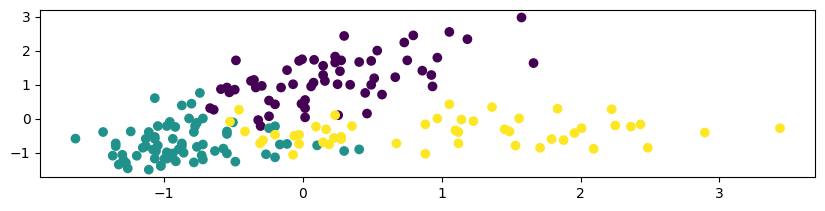

In [4]:
# プロット
%matplotlib inline

x=X_norm[:,0]
y=X_norm[:,1]
z=df_wine["class"]
plt.figure(figsize=(10,10))
plt.subplot(4, 1, 1)
plt.scatter(x,y, c=z)
plt.show

In [5]:
# x-means
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
xm_c = kmeans_plusplus_initializer(X_norm, 2).initialize()
xm_i = xmeans(data=X_norm, initial_centers=xm_c, kmax=20, ccore=True)
xm_i.process()

AttributeError: module 'numpy' has no attribute 'warnings'

In [15]:
# 結果をプロット
z_xm = np.ones(X_norm.shape[0])
for k in range(len(xm_i._xmeans__clusters)):
    z_xm[xm_i._xmeans__clusters[k]] = k+1

plt.subplot(4, 1, 2)
plt.scatter(x,y, c=z_xm)
centers = np.array(xm_i._xmeans__centers)
plt.scatter(centers[:,0],centers[:,1],s=250, marker='*',c='red')
plt.show

NameError: name 'xm_i' is not defined